# Show me the market trends to help me decide. Which US real-estate market is doing best overall.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

In [3]:
# Show all rows/columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
state_df = pd.read_csv('State_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')

### Observing the Data and  getting ready for cleaning process

In [6]:
display(state_df.head())
display(state_df.tail())

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
0,9,0,California,state,NaN,189941.083557,190575.156948,191424.465351,193265.350054,195397.239796,197695.254730,200129.563148,202680.814014,205249.308552,207687.474435,210089.498433,212436.827751,214427.382728,216394.438476,218604.646546,221344.698298,224091.384099,226598.047002,228953.572642,231229.053292,233441.402646,235518.813579,237483.617552,239329.761634,240831.310466,242351.250519,244116.002364,246480.115025,249237.054836,252299.377984,255841.895518,259668.685333,263542.106683,267230.034459,270844.482646,274407.929085,277562.845272,280499.562611,283601.065587,287202.348871,291203.810813,294921.528560,298835.148457,302960.804832,307535.168789,312007.590034,

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
46,37,47,North Dakota,state,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,163455.565957,163461.488357,163421.799119,163212.186493,162895.078575,162542.782825,162300.670385,162508.024805,162923.341134,163306.315082,163215.428520,163011.977631,162908.747495,162773.593033,162480.6004

In [7]:
print(state_df.info())
print()
print(state_df.dtypes)
print()
print(state_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Columns: 303 entries, RegionID to 2024-10-31
dtypes: float64(299), int64(2), object(2)
memory usage: 120.9+ KB
None

RegionID        int64
SizeRank        int64
RegionName     object
RegionType     object
StateName     float64
2000-01-31    float64
2000-02-29    float64
2000-03-31    float64
2000-04-30    float64
2000-05-31    float64
2000-06-30    float64
2000-07-31    float64
2000-08-31    float64
2000-09-30    float64
2000-10-31    float64
2000-11-30    float64
2000-12-31    float64
2001-01-31    float64
2001-02-28    float64
2001-03-31    float64
2001-04-30    float64
2001-05-31    float64
2001-06-30    float64
2001-07-31    float64
2001-08-31    float64
2001-09-30    float64
2001-10-31    float64
2001-11-30    float64
2001-12-31    float64
2002-01-31    float64
2002-02-28    float64
2002-03-31    float64
2002-04-30    float64
2002-05-31    float64
2002-06-30    float64
2002-07-31    float64
2002-08-31    float64

In [8]:
print('# unique: ' + str(state_df['RegionName'].nunique()))
print('# blanks: ' + str(state_df['RegionName'].isna().sum()))
print(state_df['RegionName'].unique())

# unique: 51
# blanks: 0
['California' 'Texas' 'Florida' 'New York' 'Pennsylvania' 'Illinois'
 'Ohio' 'Georgia' 'North Carolina' 'Michigan' 'New Jersey' 'Virginia'
 'Washington' 'Arizona' 'Massachusetts' 'Tennessee' 'Indiana' 'Maryland'
 'Missouri' 'Wisconsin' 'Colorado' 'Minnesota' 'South Carolina' 'Alabama'
 'Louisiana' 'Kentucky' 'Oregon' 'Oklahoma' 'Connecticut' 'Utah' 'Iowa'
 'Nevada' 'Arkansas' 'Mississippi' 'Kansas' 'New Mexico' 'Nebraska'
 'Idaho' 'West Virginia' 'Hawaii' 'New Hampshire' 'Maine' 'Rhode Island'
 'Montana' 'Delaware' 'South Dakota' 'North Dakota' 'Alaska'
 'District of Columbia' 'Vermont' 'Wyoming']


### Cleaning Data

In [10]:
#removing unused column 
state_df = state_df.drop(['StateName'], axis=1)

In [11]:
print(state_df.shape)
duplicate_rows_df = state_df[state_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

(51, 302)
number of duplicate rows:  (0, 302)


In [12]:
display(state_df.isnull().sum())

RegionID      0
SizeRank      0
RegionName    0
RegionType    0
2000-01-31    4
2000-02-29    4
2000-03-31    4
2000-04-30    4
2000-05-31    4
2000-06-30    4
2000-07-31    4
2000-08-31    4
2000-09-30    4
2000-10-31    4
2000-11-30    4
2000-12-31    4
2001-01-31    4
2001-02-28    4
2001-03-31    4
2001-04-30    4
2001-05-31    4
2001-06-30    4
2001-07-31    4
2001-08-31    4
2001-09-30    4
2001-10-31    4
2001-11-30    4
2001-12-31    4
2002-01-31    4
2002-02-28    4
2002-03-31    4
2002-04-30    2
2002-05-31    2
2002-06-30    2
2002-07-31    2
2002-08-31    2
2002-09-30    2
2002-10-31    2
2002-11-30    2
2002-12-31    2
2003-01-31    2
2003-02-28    2
2003-03-31    2
2003-04-30    2
2003-05-31    2
2003-06-30    2
2003-07-31    2
2003-08-31    2
2003-09-30    3
2003-10-31    2
2003-11-30    2
2003-12-31    2
2004-01-31    2
2004-02-29    2
2004-03-31    2
2004-04-30    2
2004-05-31    2
2004-06-30    2
2004-07-31    3
2004-08-31    2
2004-09-30    2
2004-10-31    2
2004-11-

>Very Few NAN exisit, but dropping them is not a good idea as we will remove certain states from the equation.
**As our goal here is to observe year on  year growth in each state a better approach is to clean the data & replace NAN with mean value for the specific row**

In [14]:
isNaNIndex=state_df[state_df.isna().any(axis=1)].index
display(state_df[state_df.isna().any(axis=1)])

,RegionID,SizeRank,RegionName,RegionType,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31
13,8,13,Arizona,state,136947.512024,137204.140240,137528.790623,138187.526007,138928.261139,139587.011900,140261.204931,140906.188484,141626.391432,142318.372901,142989.710052,143643.668592,144280.598389,144913.035989,145544.178647,146188.068809,146843.068117,147502.254041,148125.920714,148740.447538,149359.344858,150027.091705,150723.017604,151374.524808,151919.685194,152412.176440,152950.164104,153549.685739,154156.881828,154836.566990,155568.965498,156403.307276,157120.173792,157843.852123,158499.415526,159229.668979,159910.376556,160631.823990,161293.902211,162029.428869,162786.771843,163624.125515,164489.947193,165423.824061,166469.830340,167513.316311,168424.895325,1

In [15]:
# Calculate the mean of each row, ignoring NaN values
mean_Series = state_df.iloc[:,4:].mean(axis=1) #selecting only Quantitative data for calculating mean 

#replace each NAN row value with its corresponding mean value for the state

for i in state_df.index:
    state_df.iloc[i, :] = state_df.iloc[i, :].fillna(mean_Series[i])
#Also add the mean value of homes as column to dataframe to sort the rest of the data with it
state_df["AverageHomeValue"]=mean_Series
state_df.sort_values(by='AverageHomeValue', ascending=True,inplace=True)

In [16]:
display(state_df.iloc[isNaNIndex])

,RegionID,SizeRank,RegionName,RegionType,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,AverageHomeValue
24,25,24,Louisiana,state,105803.761785,106020.365182,106186.553395,106553.756779,106934.211742,107351.719113,107755.809469,108082.321457,108444.848426,108880.864010,109447.160473,110064.950016,110745.276184,111339.804342,111911.238006,112406.997774,112855.981511,113269.788592,113671.931866,114130.797438,114591.032176,115041.979176,115470.027815,115852.475692,116143.241104,116471.195228,116853.176699,117303.451805,118127.505150,118904.400499,119724.188384,119871.033832,119977.781955,120073.439676,120477.731675,120977.848474,121479.503610,121923.697734,122261.049132,122378.305286,122389.153026,122463.620555,122717.483022,123212.519026,123738.341680,124356.48

In [17]:
display(state_df.isnull().sum())

RegionID            0
SizeRank            0
RegionName          0
RegionType          0
2000-01-31          0
2000-02-29          0
2000-03-31          0
2000-04-30          0
2000-05-31          0
2000-06-30          0
2000-07-31          0
2000-08-31          0
2000-09-30          0
2000-10-31          0
2000-11-30          0
2000-12-31          0
2001-01-31          0
2001-02-28          0
2001-03-31          0
2001-04-30          0
2001-05-31          0
2001-06-30          0
2001-07-31          0
2001-08-31          0
2001-09-30          0
2001-10-31          0
2001-11-30          0
2001-12-31          0
2002-01-31          0
2002-02-28          0
2002-03-31          0
2002-04-30          0
2002-05-31          0
2002-06-30          0
2002-07-31          0
2002-08-31          0
2002-09-30          0
2002-10-31          0
2002-11-30          0
2002-12-31          0
2003-01-31          0
2003-02-28          0
2003-03-31          0
2003-04-30          0
2003-05-31          0
2003-06-30

In [18]:
state_df.describe()

,RegionID,SizeRank,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,AverageHomeValue
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,

In [19]:
#setting common config for plots
font_title = {'family':'serif','color':'blue','size':20}
font_axis = {'family':'serif','color':'blue','size':15}
font_others = {'family':'serif','color':'darkred','size':10}
plt.tight_layout()
plt.show()
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Home Values')

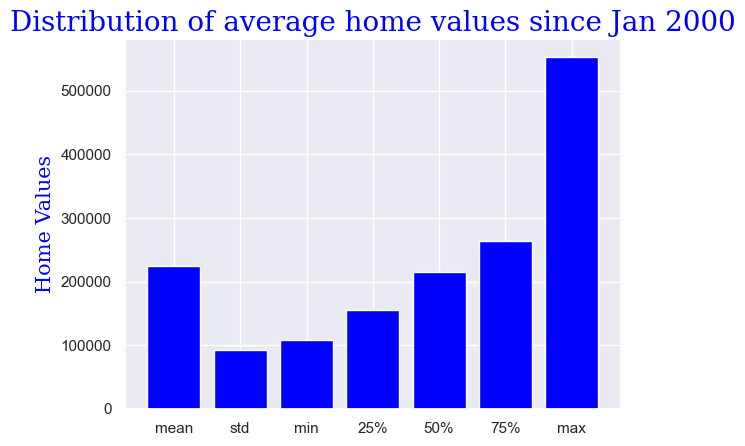

In [20]:
state_df_describe=state_df.describe()
x=state_df_describe["AverageHomeValue"][1:]
y=state_df_describe.index[1:]
plt.bar(y,x,color="blue")
plt.grid(True)

plt.title("Distribution of average home values since Jan 2000", font_title)
plt.ylabel("Home Values", font_axis)

>Observation: As Mean and Median value for the average home value is almost same for the sample, oversall distribution is symmetric!

### Transforming dataframe to another format where we can easily deduce PERCENTAGE CHANGE for each state over a 12 month period

In [23]:
state_df.head()

,RegionID,SizeRank,RegionName,RegionType,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,2023-07-31,2023-08-31,2023-09-30,2023-10-31,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,AverageHomeValue
38,61,39,West Virginia,state,73381.247456,73378.208729,73402.867726,73463.368442,73579.823204,73772.058851,74023.859759,74355.685633,74654.776177,75002.572063,75456.318418,76043.737274,76758.270503,77205.481080,77543.561795,77700.687363,78009.543355,78324.178450,78639.755388,78932.230766,79180.774312,79449.032767,79612.257629,79722.579378,79812.162335,80014.677349,80304.699045,80554.904641,80769.482107,80976.780299,81230.277969,81524.680675,81816.562420,82194.084628,82448.421081,82638.385957,82744.630421,83027.317488,83393.159731,83796.334553,84193.021934,84596.253744,85013.783184,85320.537251,85582.229111,85775.665689,86052.864418,86391.627225,86845.73913

In [24]:
state_df=state_df.iloc[:,13:].set_index(state_df.RegionName)  
# 14 is the column position for 2020-10-31 column thus giving us a starting point for october stats

In [25]:
state_df=state_df.iloc[:, ::12]
display(state_df.head())

,2000-10-31,2001-10-31,2002-10-31,2003-10-31,2004-10-31,2005-10-31,2006-10-31,2007-10-31,2008-10-31,2009-10-31,2010-10-31,2011-10-31,2012-10-31,2013-10-31,2014-10-31,2015-10-31,2016-10-31,2017-10-31,2018-10-31,2019-10-31,2020-10-31,2021-10-31,2022-10-31,2023-10-31,2024-10-31
RegionName,,,,,,,,,,,,,,,,,,,,,,,,,
West Virginia,75002.572063,79449.032767,82194.084628,85775.665689,92113.372960,99196.729842,103154.181056,105203.610936,108966.406229,101997.032179,101452.361394,99793.365505,103002.889403,102796.667370,103227.742493,110190.172773,110936.633796,112467.683979,116667.270807,118766.403607,127123.465738,141802.951419,154811.897895,159026.856798,168057.511159
Oklahoma,84207.187675,88338.382591,91425.217254,94599.536619,98138.554306,102100.195578,106892.337118,110086.918278,110846.558044,110561.336346,111010.881617,108236.757149,109090.410911,112529.757802,116774.946501,121459.217261,125098.824684,128158.394390,132629.708633,138802.690665,150649.441266,172624.613087,195092.108078,200845.100095,207274.965068
Mississippi,89554.060038,94087.358048,96517.541686,99425.555070,103230.744106,109880.280720,119092.960796,123500.507314,119683.566351,116344.801144,113210.210116,111552.357853,111365.914562,111724.290052,117743.545784,127840.625705,130548.093822,132281.735464,134858.116854,140694.689645,150232.145848,169185.884776,181380.921931,179150.152038,180612.318484
Kentucky,88699.818476,93721.001971,96571.917685,99854.765165,103027.776823,107634.446688,110912.550938,112244.521521,111653.289793,110124.385814,109830.755739,105965.536300,107722.917357,110007.381958,113072.204862,117529.703007,122873.749889,129789.593102,137450.810295,144537.714682,158467.042502,177917.125311,196554.886809,204137.249242,212754.347570
Arkansas,88623.151980,92879.078572,95730.385172,100211.031280,106184.393195,114558.687325,121598.874818,123625.597986,122393.696252,117971.840005,116962.942786,114000.040159,117111.037091,119696.862198,122291.587782,127017.326269,132223.629688,136712.157108,141185.908370,147485.444154,159357.232281,181426.780285,197488.813065,201226.025621,207658.861242


In [26]:
state_df=state_df.T # transponse the dataframe to view state wise boxplots

RegionName,West Virginia,Oklahoma,Mississippi,Kentucky,Arkansas,Kansas,Indiana,Iowa,Ohio,Alabama,Michigan,Missouri,Nebraska,Louisiana,Tennessee,Pennsylvania,South Carolina,Texas,South Dakota,Georgia,Wisconsin,Illinois,North Carolina,New Mexico,Maine,North Dakota,Minnesota,Florida,Idaho,Wyoming,Vermont,Arizona,Virginia,Delaware,Montana,New York,Alaska,Nevada,New Hampshire,Rhode Island,Utah,Connecticut,Oregon,Maryland,Colorado,Washington,New Jersey,Massachusetts,California,District of Columbia,Hawaii
2000-10-31,75002.572063,84207.187675,89554.060038,88699.818476,88623.151980,89796.643111,98523.705367,93928.224104,109362.829173,100406.911524,119818.783425,100502.689011,115664.533526,108880.864010,110965.876199,102709.712254,116238.774472,112268.380510,107327.771612,128520.757078,123985.058774,134062.589023,131949.796829,189407.564674,112258.721001,214562.010521,137360.199871,118489.514995,123508.815618,226222.391659,119808.399934,142318.372901,130555.330458,154601.958496,255092.158426,146394.806707,137085.563675,165294.551273,148441.590126,140537.990532,176908.555761,180511.040531,156230.759603,159114.632022,192869.693703,182022.738813,184239.155170,215060.921036,207687.474435,192929.056713,227958.136590
2001-10-31,79449.032767,88338.382591,94087.358048,93721.001971,92879.078572,95830.813514,102218.111076,98428.838685,114030.367220,104425.112398,127444.593388,107561.237779,107931.737692,115041.979176,115003.474446,108434.886221,121308.368059,113550.474471,109984.171980,137399.240946,131470.986876,144991.577954,136819.047183,189407.564674,125362.474062,214562.010521,155717.064593,129162.308355,128601.037853,226222.391659,129857.577915,150027.091705,141809.922002,163871.169036,255092.158426,158234.709378,167124.933963,176001.191073,171309.133599,157932.303157,180315.306712,197578.082519,162163.487821,170296.467298,214053.099929,191051.115172,204923.006135,248448.242254,235518.813579,207883.797312,241081.212375
2002-10-31,82194.084628,91425.217254,96517.541686,96571.917685,95730.385172,97788.573049,103528.400009,102563.192962,117687.582875,107013.843895,132628.286045,114604.107997,111679.987866,120073.439676,117569.563351,115910.938179,124355.687977,117304.825152,113758.562795,143214.213279,138749.746833,156157.983395,139500.214633,134665.043443,140663.102264,214562.010521,170312.506335,141816.306804,131903.965095,143771.314543,141001.920897,157843.852123,155717.086348,176284.701069,255092.158426,173099.063663,175334.953029,187098.013076,193151.099097,187293.134783,180651.101552,219097.681864,169314.466722,189787.670696,222214.320721,198980.182358,232959.011137,281884.904026,267230.034459,235456.839620,262832.414430
2003-10-31,85775.665689,94599.536619,99425.555070,99854.765165,100211.031280,101437.023395,105754.211815,107043.820309,122379.653625,110383.984322,137771.365015,121837.794566,117081.107583,124356.483300,120885.873867,125879.272536,128713.105735,120057.033013,118901.839094,147229.116316,148925.541947,167912.940590,142376.879102,138928.051123,157703.609541,214562.010521,185125.553232,158363.145954,135631.386584,150822.665322,154572.873799,167513.316311,172831.114403,194543.565881,255092.158426,192011.520215,186535.570873,207392.150069,219429.136640,224244.108507,181274.135540,246016.119350,179288.427021,216630.836864,225069.115375,210853.200688,269448.109739,318155.903670,312007.590034,276547.036572,304590.569232
2004-10-31,92113.372960,98138.554306,103230.744106,103027.776823,106184.393195,107024.614240,109090.896616,111507.588764,126660.289094,114746.730290,143090.277010,127963.256535,123062.892667,131262.872263,125737.867469,138611.318065,135190.915420,128306.570768,126635.224994,152215.960457,161923.341909,181863.989539,146610.013029,147615.340027,179931.755275,214562.010521,200149.503090,183803.827812,142722.297585,162718.477894,172449.927658,186714.866066,205018.102579,219493.430485,255092.158426,211999.211709,201071.189369,284516.514488,242850.846602,263455.325123,184073.685002,275799.943181,195872.750018,257127.896

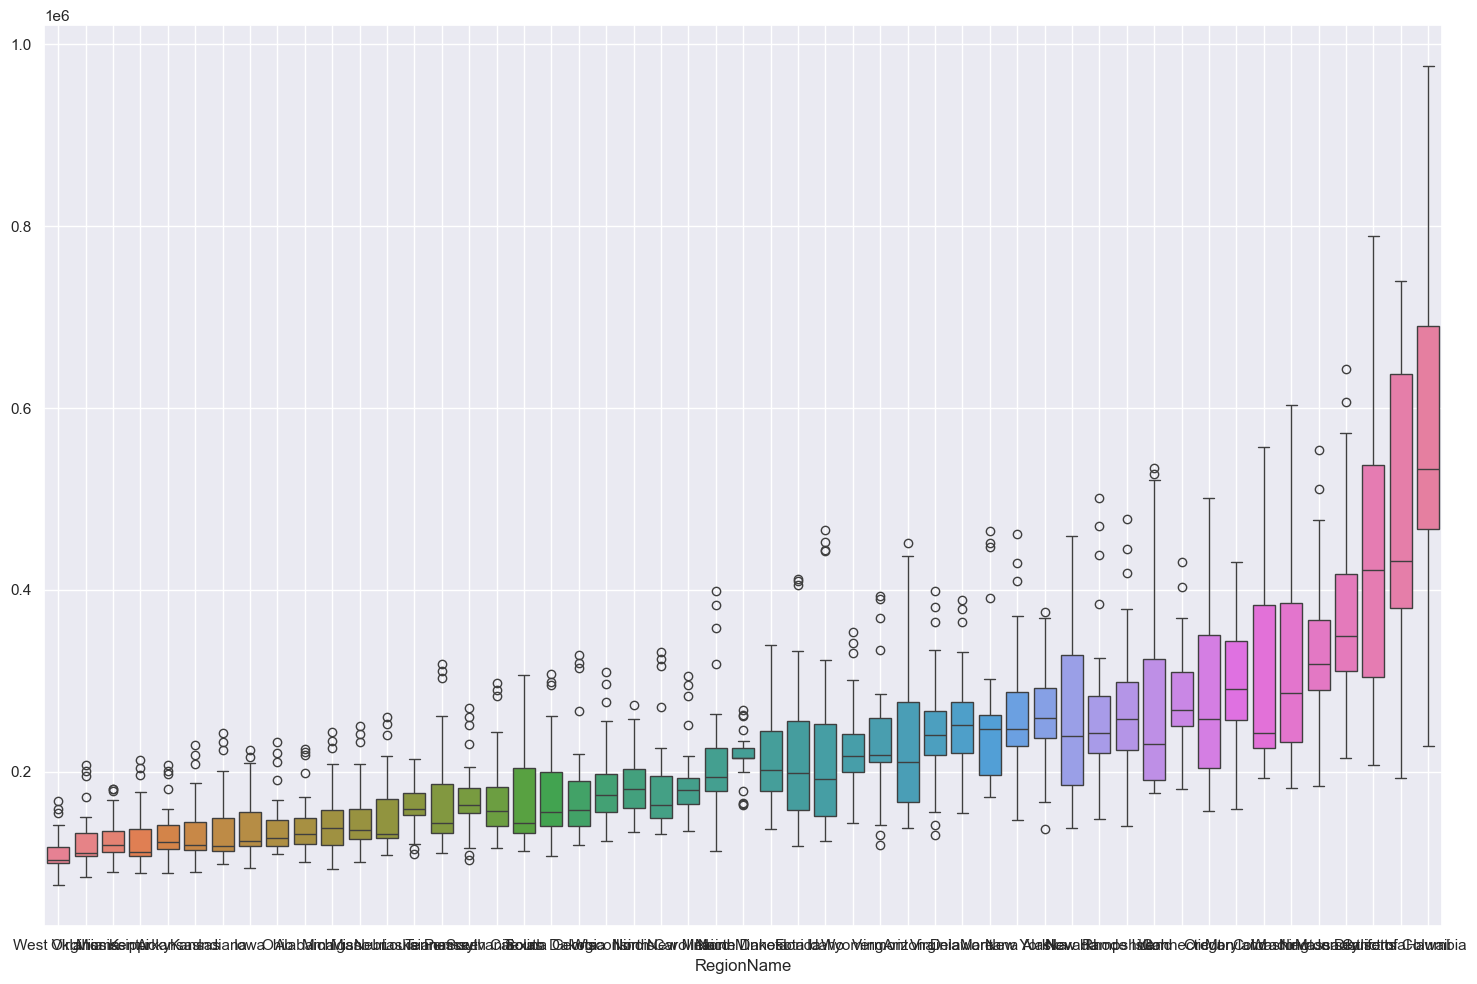

In [27]:
plt.figure(figsize=(15, 10))
sns.set_theme(style="darkgrid")
display(state_df.head(5))
bxplt=sns.boxplot(state_df)
state_df.index = pd.to_datetime(state_df.index, errors='coerce')
plt.grid(True)
plt.tight_layout()
plt.show()

> Observation : very few outliers thus working with this data as is to avoid missing trends.

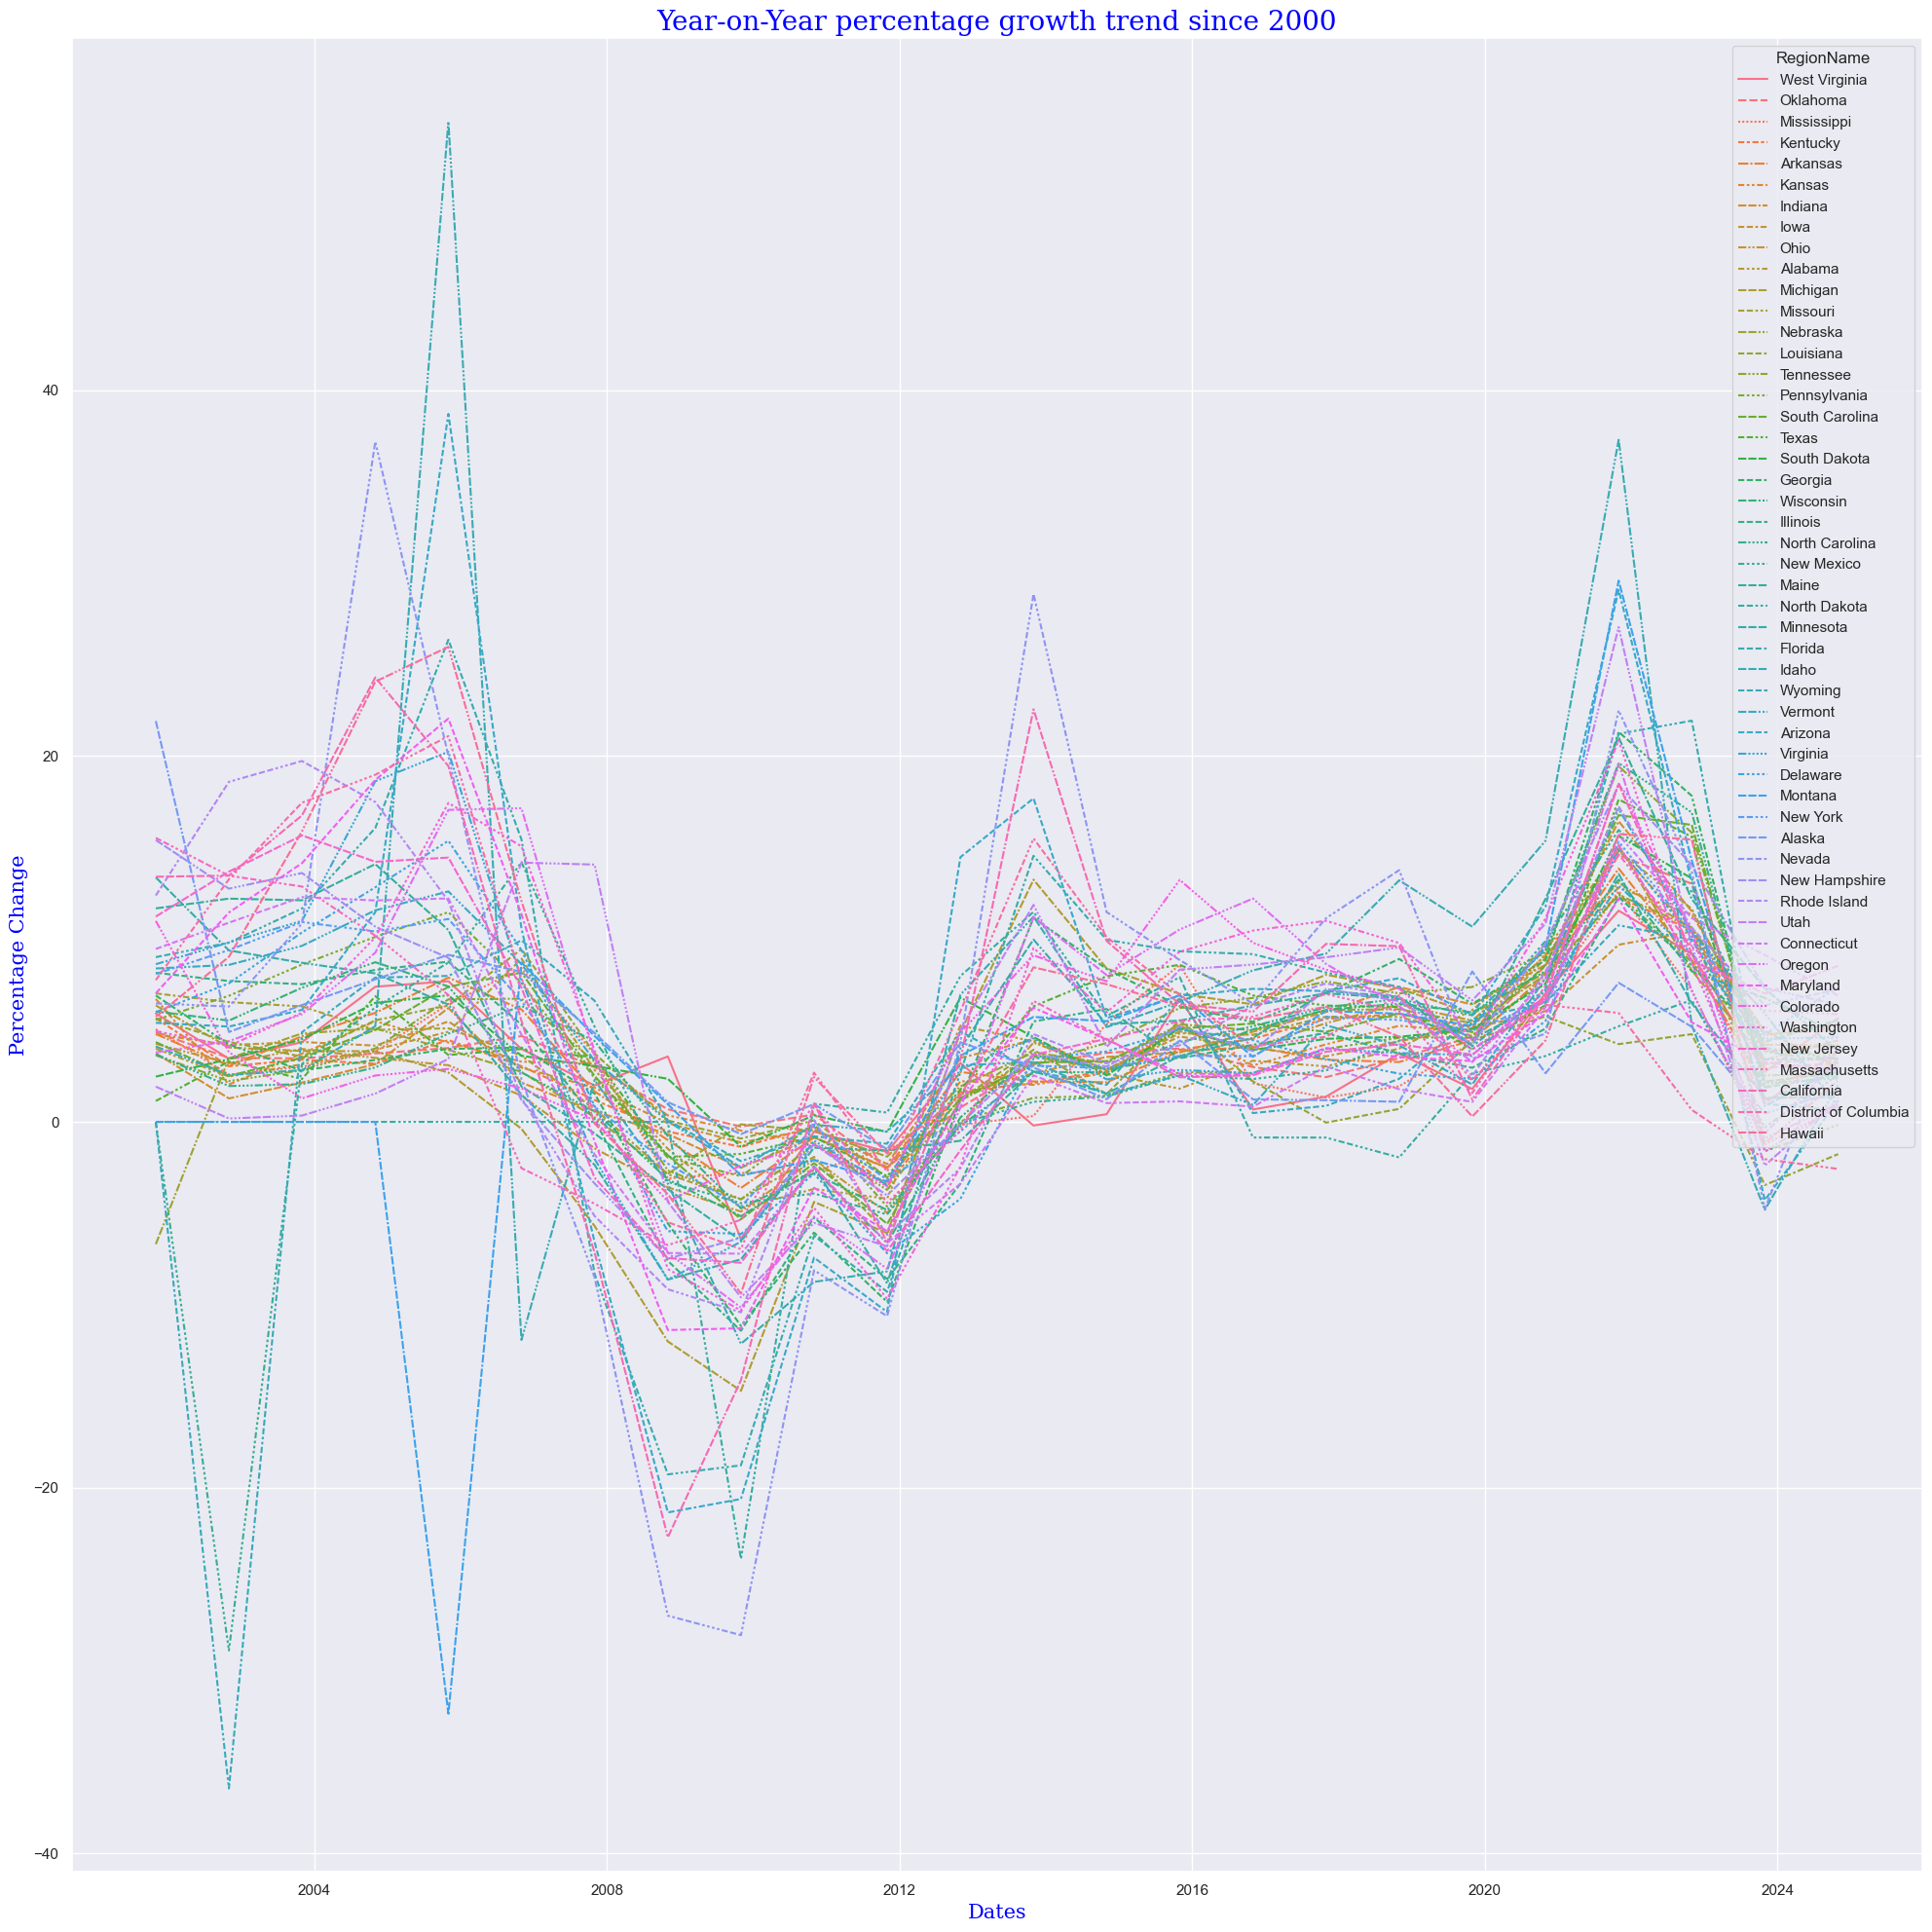

In [29]:
state_df_change_by_year= state_df.pct_change(periods=1)*100
plt.figure(figsize=(20, 20))
lnplt=sns.lineplot(data=state_df_change_by_year)
plt.title("Year-on-Year percentage growth trend since 2000", fontdict=font_title)
plt.xlabel("Dates", fontdict=font_axis)
plt.ylabel("Percentage Change", fontdict=font_axis)
plt.grid(True)
plt.tight_layout()
plt.show()

>Observation: There has been periods of high variance (both postive and negative ) every 4-5 years.
>
>Considering only last 3 years to calclulate which states shows best growth in value year-on-year

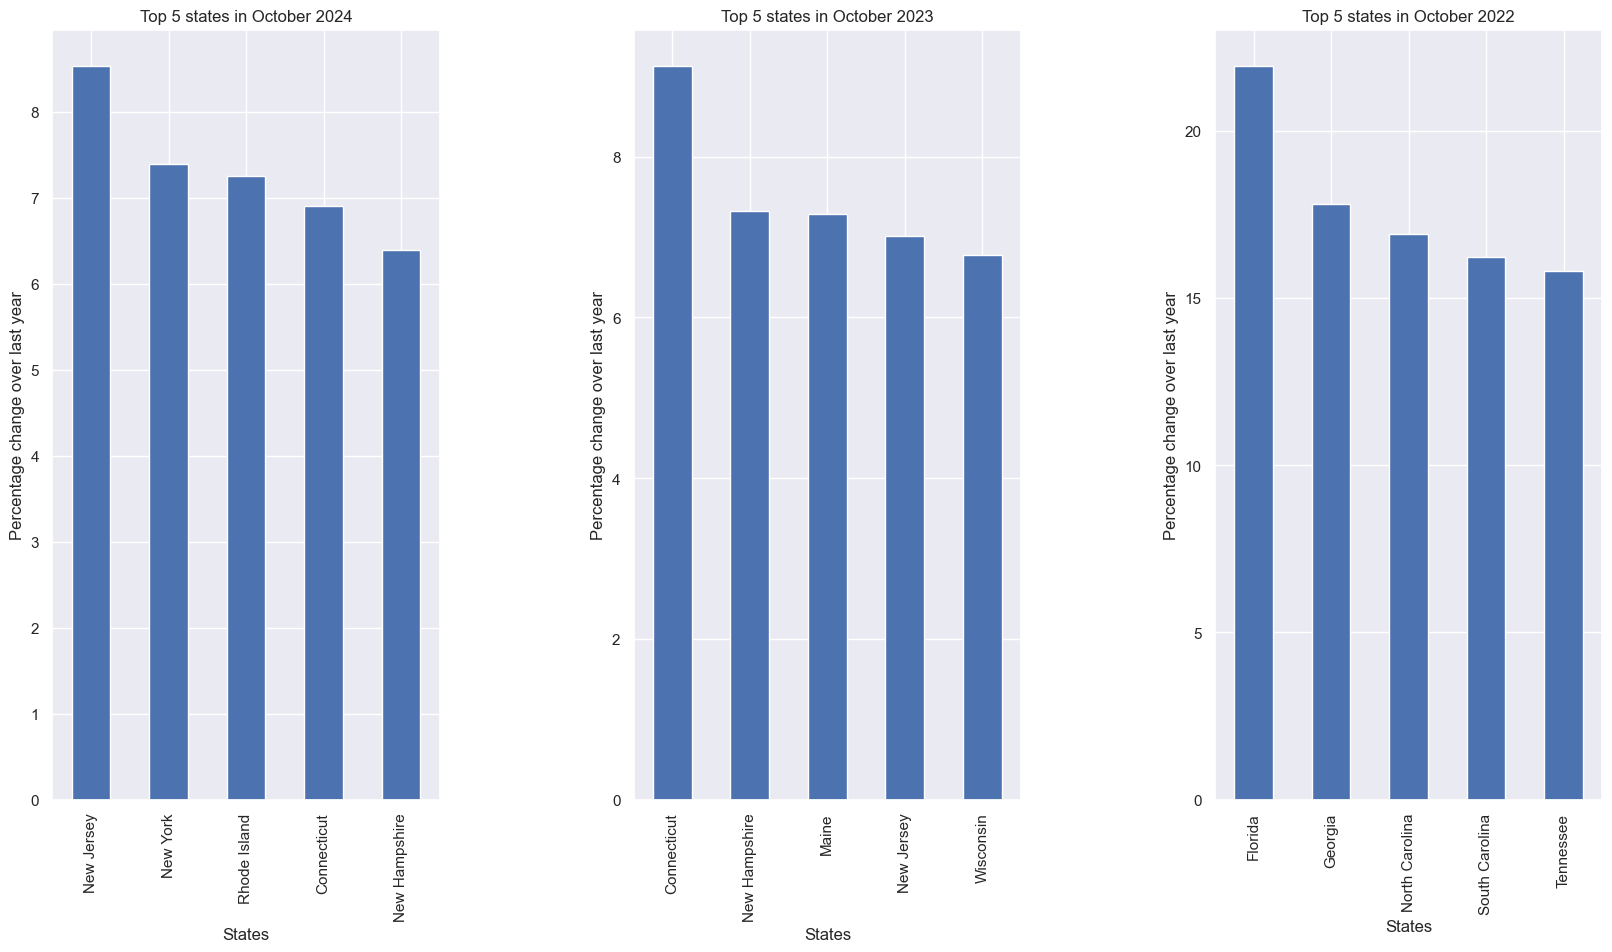

In [31]:
# Select the latest month for trend analysis and only considering top 5 for each year
row_to_plot_2024 = state_df_change_by_year.loc['2024-10-31'].sort_values(ascending=False)[:5] 
row_to_plot_2023 = state_df_change_by_year.loc['2023-10-31'].sort_values(ascending=False)[:5] 
row_to_plot_2022 = state_df_change_by_year.loc['2022-10-31'].sort_values(ascending=False)[:5] 

top5_states_2024_index=row_to_plot_2024.index
top5_states_2023_index=row_to_plot_2023.index
top5_states_2022_index=row_to_plot_2022.index
top_states_3years_index=top5_states_2024_index.append(top5_states_2023_index).append(top5_states_2022_index).unique()
# we will use these index further to plot various relationships

plt.figure(figsize=(20, 10))

# Customize the plot
plt.subplot(1,3,1)
row_to_plot_2024.plot(kind='bar')
plt.title('Top 5 states in October 2024')
plt.xlabel('States')
plt.ylabel('Percentage change over last year')
plt.subplot(1,3,2)
row_to_plot_2023.plot(kind='bar')
plt.title('Top 5 states in October 2023')
plt.xlabel('States')
plt.ylabel('Percentage change over last year')
plt.subplot(1,3,3)
row_to_plot_2022.plot(kind='bar')
plt.title('Top 5 states in October 2022')
plt.xlabel('States')
plt.ylabel('Percentage change over last year')
plt.subplots_adjust(wspace=0.5, hspace=0.5)

In [32]:
state_df_change_by_year_Last3Years=state_df_change_by_year[top_states_3years_index]['2022-10-31':]

<Axes: title={'center': 'Violin Plot for states showing most promise in last 3 years'}, xlabel='States', ylabel='Percentage increase last year'>

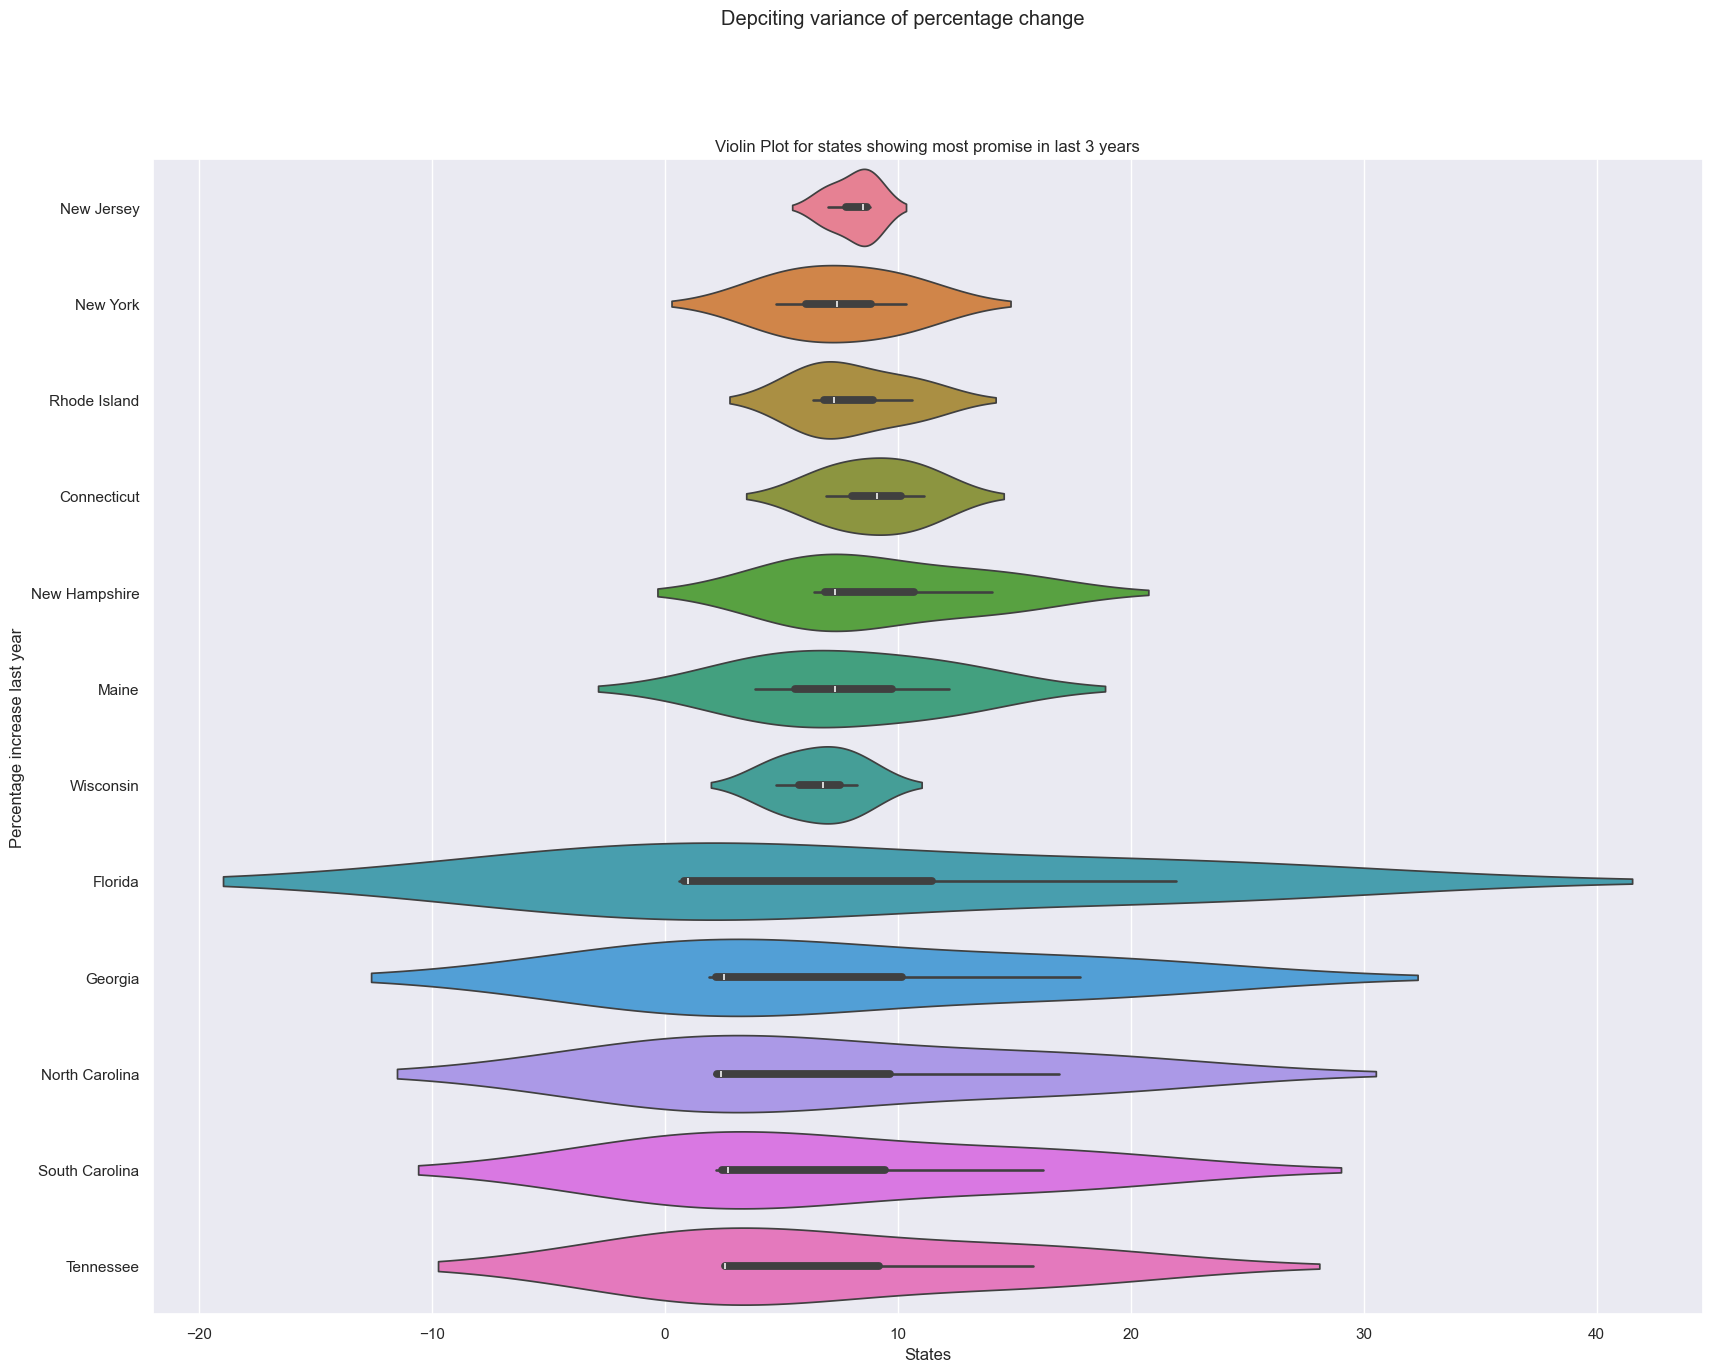

In [33]:
plt.figure(figsize=(20, 15))
# Customize the plot
plt.title('Violin Plot for states showing most promise in last 3 years')
plt.suptitle('Depciting variance of percentage change' )
plt.xlabel('States')
plt.ylabel('Percentage increase last year')
sns.violinplot(state_df_change_by_year_Last3Years,orient="h")

>Observation: Eventhough these states have shown high percentage growth in the last few years some of them have very high variance. To be more conservative in our investment profile, we would coinsider only states having percentage high growth but low variance in growth.
>> New York & New Jersey have the least variance in terms of percentage change
>> Checking again for how  New York & New Jersey Stack up against the rest of the states

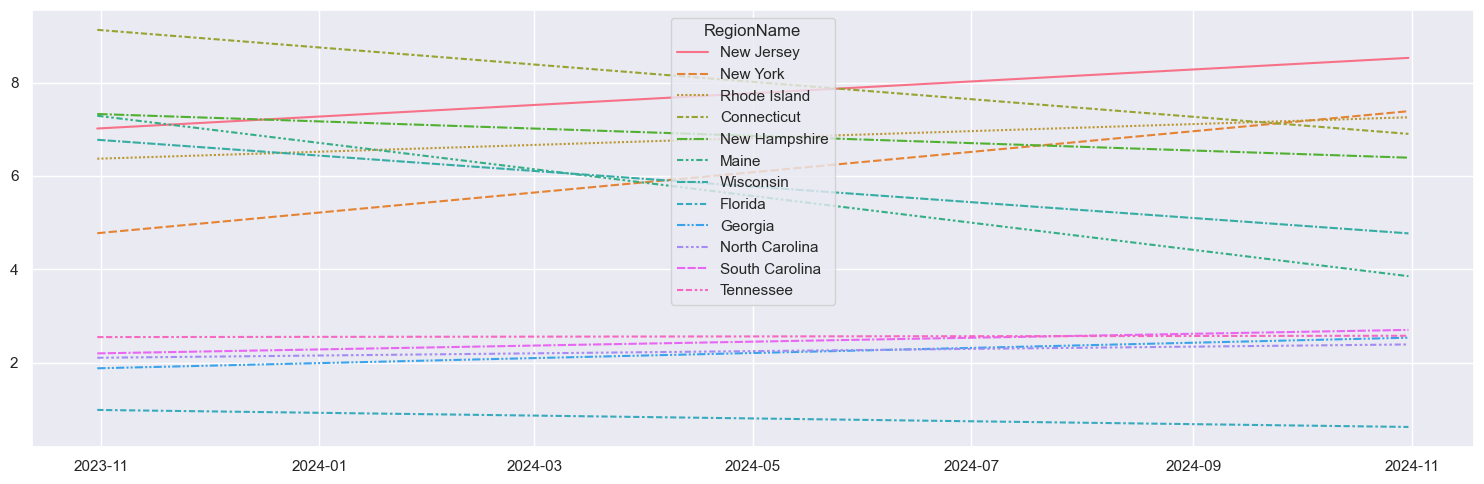

In [35]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15, 5))
sns.lineplot(state_df_change_by_year[top_states_3years_index]['2023-10-31':])
plt.grid(True)
plt.tight_layout()

> New York, New Jersey & Rhode Island have a steeper upward trend compared to other states last year

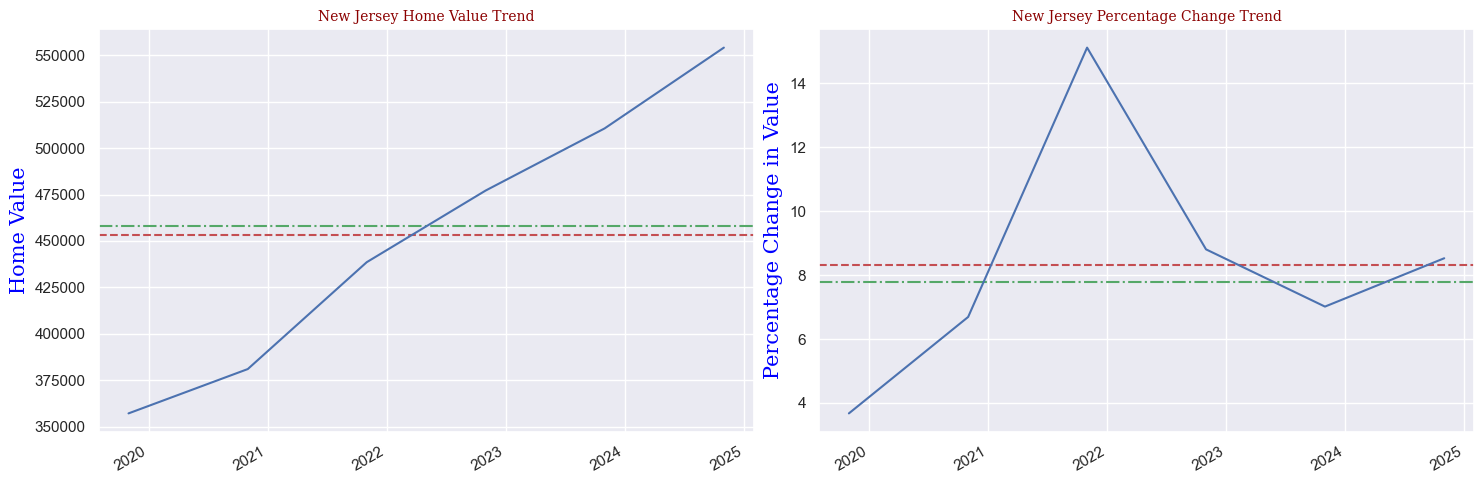

In [37]:
New_Jersey_value_df=state_df["New Jersey"]['2019-10-31':]
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.axhline(y=New_Jersey_value_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=New_Jersey_value_df.median(), color='g', linestyle='-.', label='Median')
plt.title("New Jersey Home Value Trend",fontdict=font_others)
plt.ylabel("Home Value",fontdict=font_axis)
New_Jersey_value_df.plot(kind="line")
plt.grid(True)
plt.tight_layout()


New_Jersey_pctg_df=state_df_change_by_year["New Jersey"]['2019-10-31':]
plt.subplot(1,2,2)
plt.axhline(y=New_Jersey_pctg_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=New_Jersey_pctg_df.median(), color='g', linestyle='-.', label='Median')
plt.title("New Jersey Percentage Change Trend",fontdict=font_others)
plt.ylabel("Percentage Change in Value",fontdict=font_axis)
New_Jersey_pctg_df.plot(kind="line")
plt.grid(True)
plt.tight_layout()


plt.subplots_adjust(wspace=.1, hspace=0.5)

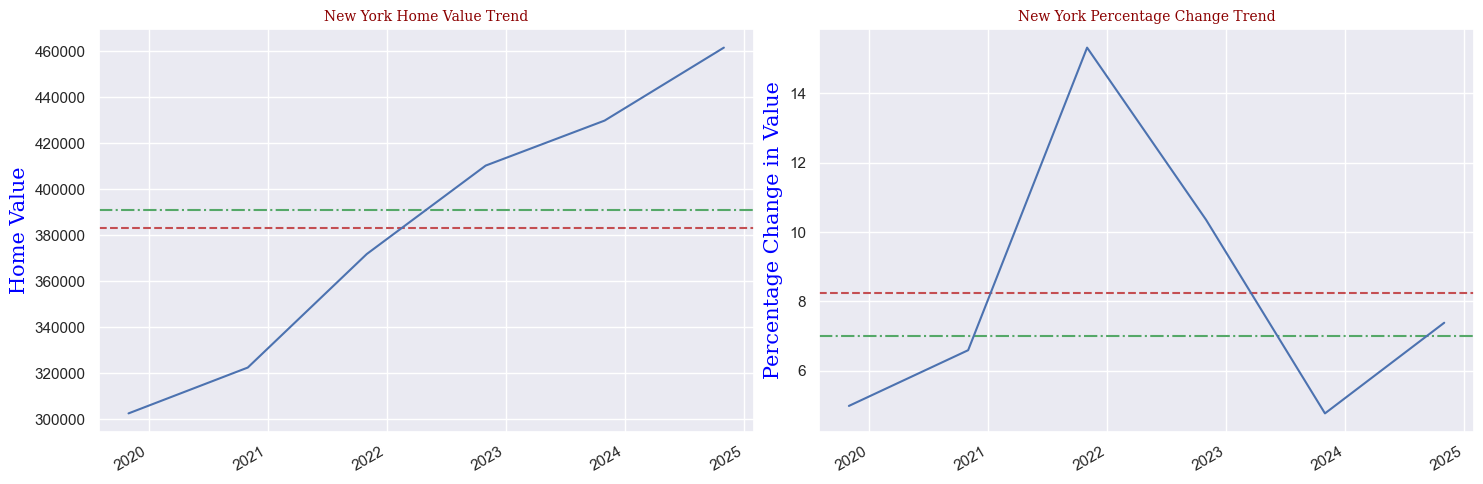

In [38]:
New_York_value_df=state_df["New York"]['2019-10-31':]
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.axhline(y=New_York_value_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=New_York_value_df.median(), color='g', linestyle='-.', label='Median')
plt.title("New York Home Value Trend",fontdict=font_others)
plt.ylabel("Home Value",fontdict=font_axis)
New_York_value_df.plot(kind="line")
plt.grid(True)
plt.tight_layout()


New_York_pctg_df=state_df_change_by_year["New York"]['2019-10-31':]
plt.subplot(1,2,2)
plt.axhline(y=New_York_pctg_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=New_York_pctg_df.median(), color='g', linestyle='-.', label='Median')
plt.title("New York Percentage Change Trend",fontdict=font_others)
plt.ylabel("Percentage Change in Value",fontdict=font_axis)
New_York_pctg_df.plot(kind="line")
plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(wspace=.1, hspace=0.5)

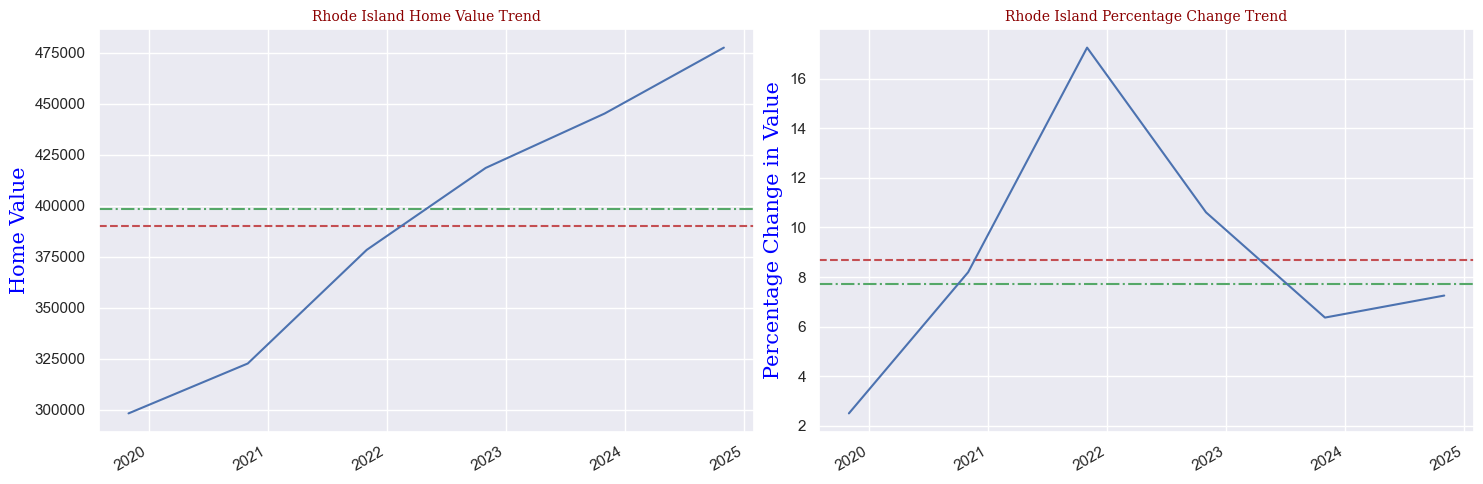

In [39]:
Rhode_Island_value_df=state_df["Rhode Island"]['2019-10-31':]
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.axhline(y=Rhode_Island_value_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=Rhode_Island_value_df.median(), color='g', linestyle='-.', label='Median')
plt.title("Rhode Island Home Value Trend",fontdict=font_others)
plt.ylabel("Home Value",fontdict=font_axis)
Rhode_Island_value_df.plot(kind="line")
plt.grid(True)
plt.tight_layout()


Rhode_Island_pctg_df=state_df_change_by_year["Rhode Island"]['2019-10-31':]
plt.subplot(1,2,2)
plt.axhline(y=Rhode_Island_pctg_df.mean(), color='r', linestyle='--', label='Mean')
plt.axhline(y=Rhode_Island_pctg_df.median(), color='g', linestyle='-.', label='Median')
plt.title("Rhode Island Percentage Change Trend",fontdict=font_others)
plt.ylabel("Percentage Change in Value",fontdict=font_axis)
Rhode_Island_pctg_df.plot(kind="line")
plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(wspace=.1, hspace=0.5)

## observe states with biggest positive change in the last 3 years 

In [41]:
top_states_3years=state_df[["New Jersey","New York","Rhode Island"]]['2019-10-31':]
display(top_states_3years.head())

RegionName,New Jersey,New York,Rhode Island
2019-10-31,357079.105825,302459.419948,298336.537709
2020-10-31,380970.843473,322404.773555,322789.991762
2021-10-31,438569.780396,371784.320309,378465.155209
2022-10-31,477190.187396,410282.998506,418615.939558
2023-10-31,510665.704127,429865.812600,445273.882854


In [42]:
display(top_states_3years.describe())

RegionName,New Jersey,New York,Rhode Island
count,6.000000,6.000000,6.000000
mean,453115.025745,383068.764924,390177.062221
std,75831.457222,62298.404206,70138.038634
min,357079.105825,302459.419948,298336.537709
25%,395370.577704,334749.660244,336708.782624
50%,457879.983896,391033.659408,398540.547384
75%,502296.824944,424970.109077,438609.397030
max,554214.533253,461615.264629,477580.866232


### Looking at the above Data we would recommend investing in the state of New York 

> Lowest standard deviation for Growth rate for last 3 years
> upward trend is also steep in the last year.